In [2]:
import pandas as pd
import numpy as np

In [3]:
from dask.delayed import delayed
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
def load_dd_delayed(keyword):
    with open('/data/clusterdata/cluster-trace-gpu-v2020/data/pai_%s.header' % keyword) as fin:
        lines = fin.readlines()
        col_names = lines[0].strip().split(',')

    col_names

    dfs = delayed(pd.read_csv)('/data/clusterdata/cluster-trace-gpu-v2020/data/pai_%s.tar.gz' % keyword, 
                               header=None, index_col=False, names=col_names, delimiter=',')

    dd_delayed = dd.from_delayed(dfs)

    return dd_delayed

In [6]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [7]:
dd_delayed = load_dd_delayed('job_table')

In [8]:
job_df = dd_delayed.compute()

In [9]:
job_df

,job_name,inst_id,user,status,start_time,end_time
0,pai_job_table.csv,38e2d7187762a9241cc1cd5732dbe52a5d8b37ed7dafe1...,74238accb90b,Running,1053513.0,NaN
1,9605ac7cc4c55a193fbe956b,e1cbdf28400847d65d00da4f0522ce7a43275fe9cb5d2a...,61d6b6dd5b15,Running,1097614.0,NaN
2,a2d8872d080eb634a42ea9a6,27ddabc2f7490279c6d5bd95c8a75e5c96d841c6030659...,61d6b6dd5b15,Running,1103820.0,NaN
3,e8baa72bfcd1b723cafab26a,70e4f598c8cdf40f24e0e7d3aba9a9dacde5342e1f2ffd...,61d6b6dd5b15,Terminated,1104396.0,1140852.0
4,4e87f469c73e13613908b658,5bb3500e7f1a42a9ce82544dad5f202547848e9727e221...,61d6b6dd5b15,Terminated,1109911.0,1233527.0
...,...,...,...,...,...,...
1055497,a155d69dca6bfd2dfb78ef0d,267c02fbda06c42fb83fc8034d2be1c51149127deb2292...,a4187a15253d,Terminated,6420116.0,6431658.0
1055498,e4e802c3b63829c1e2e3343b,37c6523c16f1574055fb637a82bb22a913122d58c8368a...,a4187a15253d,Running,6431847.0,NaN
1055499,f11820cc3d678bcdc37faf08,d50242c89f3a25bd20ef700701777823c415ad0321dcb3...,a4187a15253d,Terminated,6431859.0,6431872.0
1055500,ee3480523c1bf79b0d02c260,6c6338d4ac59fd1157e569fd6b5de6b70975c65112e9ba...,a4187a15253d,Terminated,6431969.0,6435635.0


In [10]:
dd_delayed = load_dd_delayed('task_table')

In [11]:
task_df = dd_delayed.compute()

In [12]:
task_df

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type
0,pai_task_table.csv,tensorflow,1.0,Terminated,2693235.0,2695847.0,600.0,29.296875,50.0,MISC
1,455c3dec270f4777ad67721c,tensorflow,1.0,Terminated,3399583.0,3399732.0,600.0,29.296875,100.0,MISC
2,ba64aa2f0feff18428923e92,tensorflow,1.0,Terminated,2152271.0,2158213.0,600.0,29.296875,50.0,MISC
3,704783be2a4b7f88b8d2e4ee,worker,100.0,Failed,2172980.0,NaN,600.0,9.765625,10.0,MISC
4,bce3b9c55772f9d1e85fe796,PyTorchWorker,4.0,Failed,2374681.0,NaN,400.0,10.000000,100.0,V100
...,...,...,...,...,...,...,...,...,...,...
1261046,d14050801987e35369e03724,tensorflow,1.0,Failed,4800428.0,NaN,600.0,29.296875,100.0,P100
1261047,82c2ef92658b13173b215d09,worker,1.0,Running,4724430.0,NaN,800.0,39.062500,70.0,MISC
1261048,906db91bc6f3321e94a6b472,tensorflow,1.0,Terminated,4732036.0,4739163.0,600.0,29.296875,10.0,MISC
1261049,14ea663f749cfe55be1bc088,tensorflow,1.0,Failed,4732294.0,NaN,600.0,29.296875,10.0,MISC


In [13]:
task_df.task_name.value_counts()

tensorflow           621415
worker               275785
ps                   183283
PyTorchWorker        110784
xComputeWorker        27402
evaluator             17210
TensorboardTask       10681
DecoderWorker          4136
ReduceTask             4136
JupyterTask            2066
TVMTuneMain            1158
OpenmpiTracker          745
OpenmpiWorker           745
OssToVolumeWorker       672
MWorker                 404
chief                   371
BladeMain                39
aligraph                  6
TransformGraph            3
M1                        3
R2_1                      2
TfClientWorker            2
R3_1_2                    1
M2                        1
Name: task_name, dtype: int64

In [14]:
dd_delayed = load_dd_delayed('instance_table')

In [15]:
instance_df = dd_delayed.compute()

In [16]:
instance_df

,job_name,task_name,inst_name,worker_name,inst_id,status,start_time,end_time,machine
0,pai_instance_table.csv,worker,c47ee192deea8c5aa87d8d7c2e02120cd03f75304a69dd...,05b1590648df3f4c6deea2496bbbefd4d3ae93347669f7...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273065.0,165261853e188ca69c4fbcdf
1,54670e2998350a9f0e4868d5,worker,92759a73039692b2d3e0929cadf55f5b07b40d6582c36f...,cbc1bc591c53301bceafa44dc626288fd92d2fc5dca438...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273056.0,31dbf829549b10917e7193a6
2,54670e2998350a9f0e4868d5,worker,b3e42abde4c35da06ff4746802b82678b1bf56b28efaa1...,09d41bf627188adc004b2db7c0a47578325952cc3340af...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273067.0,31dbf829549b10917e7193a6
3,54670e2998350a9f0e4868d5,worker,d0f2e1f76ff463bcd08302370cc2f9bf0ec1333a3b25e3...,1a631e8be3fd787c2891c15b9e9bac6df4f177efc9ec7b...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273058.0,3765d45e2eca88d1d1da7cef
4,54670e2998350a9f0e4868d5,worker,0243b1305fd38f228634b23f69de5ed5ce801360eeffdc...,59aea81c00cccb5cd01ca2f7f72877d6bc73b427821986...,68889727c2257f702108d185e5eed342a39807a2893d4b...,Terminated,3272995.0,3273059.0,c0d6760f6248ea8260e36fa5
...,...,...,...,...,...,...,...,...,...
7521998,8fd48d39330b56b9805b05ec,tensorflow,24f37942cfa3cbea71fde25b16180e9d0c44624cd7d675...,56c52f06271aab3656df9ec6860f82db0b0f6797eb82d7...,61c44f7f8924420946915df92ad4a4311d89382b6b50ee...,Failed,4359745.0,NaN,12bcc4fceea93a30d7d0f324
7521999,5889118c3568a72621d4bd01,tensorflow,5d54569a1bcaaa80762614e81775ff5527c440eef2d231...,dee191654e340b7326cd0390fc3728b3759266ff34401a...,6ffec1496e69ed83e7dc483be6310dec99ef9f425cc501...,Terminated,4333482.0,4333505.0,72589c833bbdadca0cf899e7
7522000,bb584cd96021d283a2440e15,xComputeWorker,3c208076aa39e45fc9e035436d1c7c477e39c13ae6d712...,b005700878c88929eb6d02a5b5969da7105f481d267147...,800f2f40114a48ce9b6e0e409c07a1cfcc4861ea8cc408...,Terminated,6254956.0,6255327.0,e03928576b1cd17e64172f14
7522001,fbcddffa9fa853342ebd6b49,PyTorchWorker,e8fe079da9038d943538e624373bbb8d4c6f1a9fad8777...,82ca9df5a758df39da151e33c71b0f00c9a981bc320ab2...,5ac3ce47b830518c827b7bd9f17e091733742fb79c09cc...,Terminated,4525192.0,4533064.0,89a4d0ecb6a1a0b6f69affca


In [17]:
dd_delayed = load_dd_delayed('sensor_table')

In [18]:
sensor_df = dd_delayed.compute()

## EDA on Subset

In [19]:
examples = sensor_df[sensor_df['task_name'].isin(['PyTorchWorker', 'JupyterTask', 'tensorflow'])]

In [20]:
dd_delayed = load_dd_delayed('machine_spec')

In [21]:
machine_spec_df = dd_delayed.compute()

In [22]:
machines_rel = machine_spec_df[machine_spec_df.machine.isin(list(examples.machine.values))]

In [23]:
examples_gpu_type = []
for machine in examples.machine.values:
    examples_gpu_type.append(machines_rel[machines_rel.machine == machine]['gpu_type'].values)

In [24]:
example_gpu_type_fin = []

len(examples_gpu_type)

for x in examples_gpu_type:
    if len(x) > 0:
        example_gpu_type_fin.append(x[0])
    else:
        example_gpu_type_fin.append('')

In [25]:
examples['gpu_type'] = example_gpu_type_fin

/tmp/ipykernel_3994546/1422186822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  examples['gpu_type'] = example_gpu_type_fin


In [26]:
examples

,job_name,task_name,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count,gpu_type
2388,a7062ec8abaf0fa42c472191,tensorflow,b8a6db42aa3b164c7be973a9a10c067918337de4d1ee74...,c3c867669e5d57102d969d1103349a78adf7516330dc69...,af1497a5c3d710f9d7f797ab,/dev/nvidia3,201.553583,33.845371,17.840304,98.989258,60.518854,60.525391,6.910453e+05,1.853040e+05,344.292232,116.668728,V100
2474,35f41a2a1ef2d98a92b9b428,tensorflow,678e44d6b438b1f9ae3709c058037b3f19dd8cde7f06d4...,a9569d623d86bcae593213e14fe7831967febc2d99eb88...,648b64346d50d1ac0eb46134,/dev/nvidia7,145.537686,0.951056,2.741025,3.049805,0.252930,0.252930,1.041469e+09,1.850120e+06,23467.704894,10630.332054,MISC
2478,64147168128f23318d72237c,PyTorchWorker,1c65ec6cd86d373c1d0e36cd6881e24cf6643678cdf495...,29995403cf00df18ec244ea0fc86d1f4b60d1d7a4bae1c...,7cfa198d850baae8c3ba0e2a,/dev/nvidia7,752.950640,1.133401,21.459907,21.612305,3.186523,3.186523,5.168530e+07,1.265405e+07,1292.781320,835.195533,MISC
2479,c4b176689168fab86990ee9f,tensorflow,c73e94510eee67217e5448c6309ce0b7655268265f4b38...,aa75e3ee7eb138cd6de6460d7581891dcbfda7a05da376...,3b127c8abb4f26e57b34af81,/dev/nvidia2,270.530120,1.647059,1.835581,2.126953,0.275632,0.276367,1.034540e+09,9.759283e+06,32076.160920,10331.114943,MISC
2480,a5b23e98074a1cdf69026ca1,tensorflow,900050fa2bad1a5f99e272cebf3eb17b72b10da625a95d...,3f5d87fc442c7bef1da8f5078d07821d0e2fa365de82e6...,16b3cec68193e8b041dcd447,/dev/nvidia5,174.655373,0.021277,2.141377,2.526367,0.275565,0.276367,7.055758e+08,2.056109e+06,30009.594203,6887.228019,MISC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033227,d0e0a3558abce5d45072863a,PyTorchWorker,000a541be117d8643e6d830c287b4cd872d59b1cfb47cf...,c99f2b75c7ad053a485cfb87ca55adee17efd3d52bd52d...,1aafda90cc6f46f0f4f90e32,/dev/nvidia0,79.750000,0.000000,0.429199,0.747070,0.000000,0.000000,1.922363e+08,2.869013e+08,21165.800000,19090.600000,MISC
3033228,7ff3e872b8be51537beeefde,PyTorchWorker,4e0e26f837a6c8882a1e672ffd3c3484d1e2d8a83a816d...,b99050ffacf3f321400a836d0e9f9183d49fa4b695aada...,12bcc4fceea93a30d7d0f324,/dev/nvidia0,112.500000,0.000000,0.329102,0.641602,0.000000,0.000000,1.696908e+08,2.661021e+08,16798.000000,16447.666667,MISC
3033229,a155d69dca6bfd2dfb78ef0d,JupyterTask,7245da946677b8ed70a486cffd5bb93a2296d652286ecb...,267c02fbda06c42fb83fc8034d2be1c51149127deb2292...,943fe1a04fa90bf140cb9d85,/dev/nvidia7,6.725577,0.000000,2.187771,3.404297,0.000000,0.000000,9.655890e+06,1.389712e+07,1762.840284,1969.509317,MISC
3033230,f11820cc3d678bcdc37faf08,PyTorchWorker,3fc512df15638907eb4b04a67c28fe77132aed60a53a97...,d50242c89f3a25bd20ef700701777823c415ad0321dcb3...,14c1d6a040a33046698786e1,/dev/nvidia2,73.000000,0.000000,0.143555,0.270508,0.000000,0.000000,6.101400e+07,7.727868e+07,4462.333333,3738.333333,MISC


Text(0.5, 1.0, 'GB of GPU memory used (on average)')

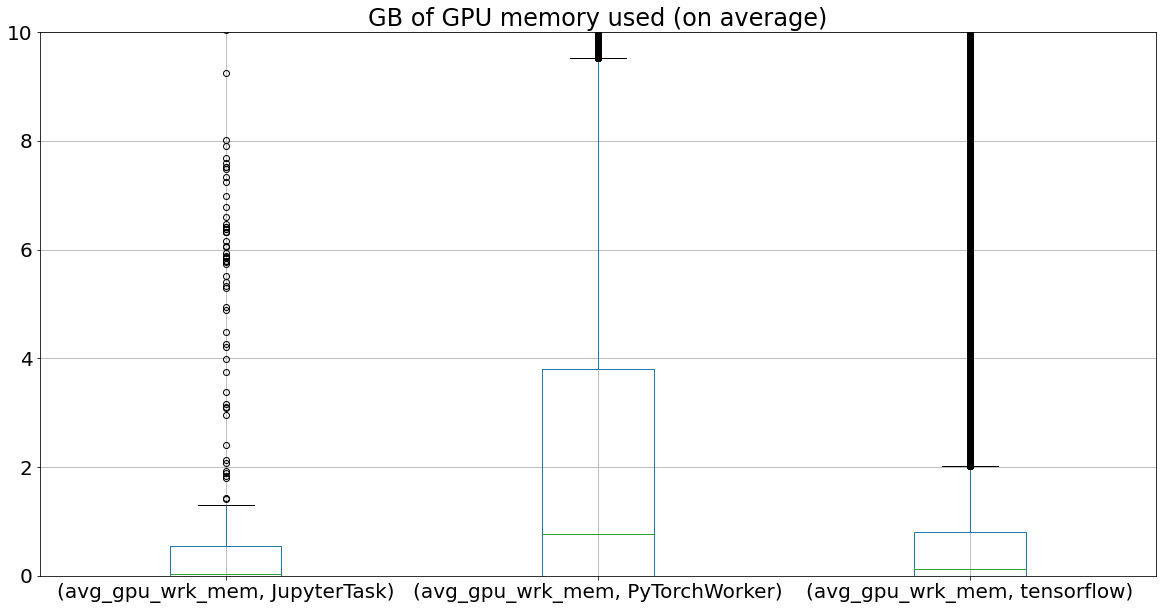

In [27]:
examples[['avg_gpu_wrk_mem','task_name']].pivot(columns='task_name').boxplot(figsize=(20,10), fontsize=20)
plt.ylim(0, 10)
plt.title("GB of GPU memory used (on average)", fontsize=24)

Text(0.5, 1.0, 'GB of main memory used (on average)')

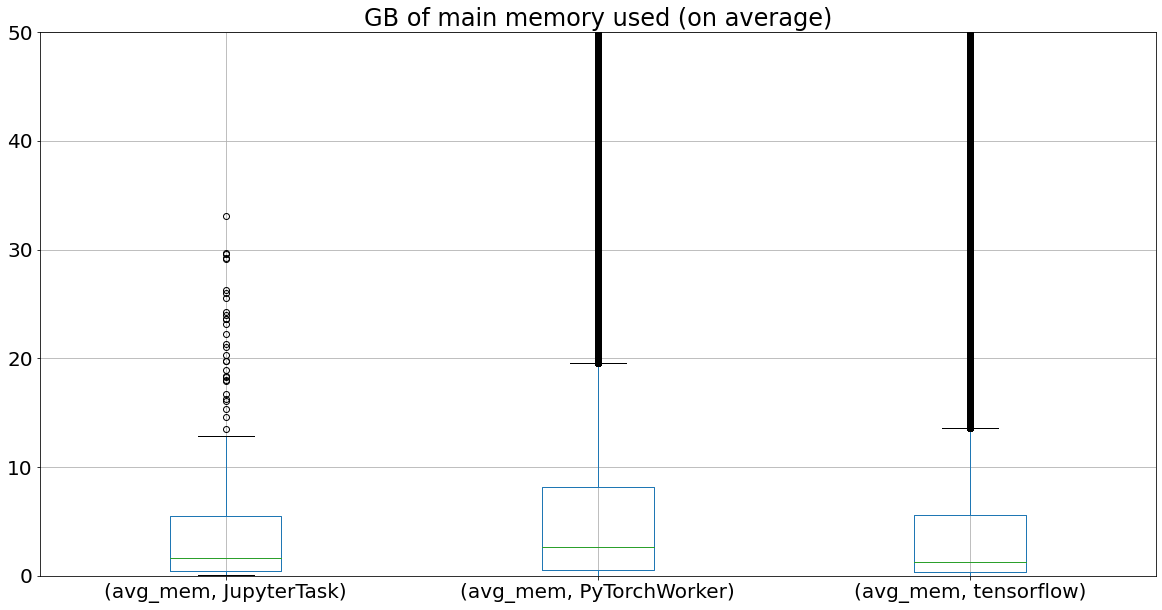

In [28]:
examples[['avg_mem','task_name']].pivot(columns='task_name').boxplot(figsize=(20,10), fontsize=20)
plt.ylim(0, 50)
plt.title("GB of main memory used (on average)", fontsize=24)

Text(0.5, 1.0, 'number of GPUs used in percentage (i.e., 50.0 is 50% GPU) ')

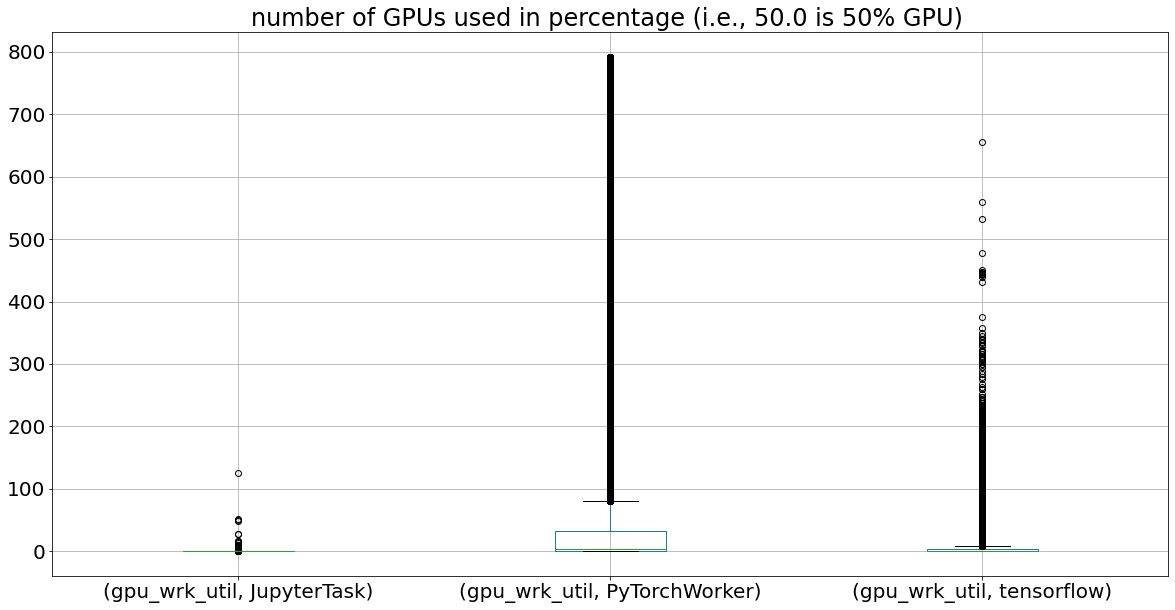

In [29]:
examples[['gpu_wrk_util','task_name']].pivot(columns='task_name').boxplot(figsize=(20,10), fontsize=20)
plt.title("number of GPUs used in percentage (i.e., 50.0 is 50% GPU) ", fontsize=24)

Text(0.5, 1.0, 'number of CPU cores used in percentage (i.e., 600.0 is 6 vCPU cores)')

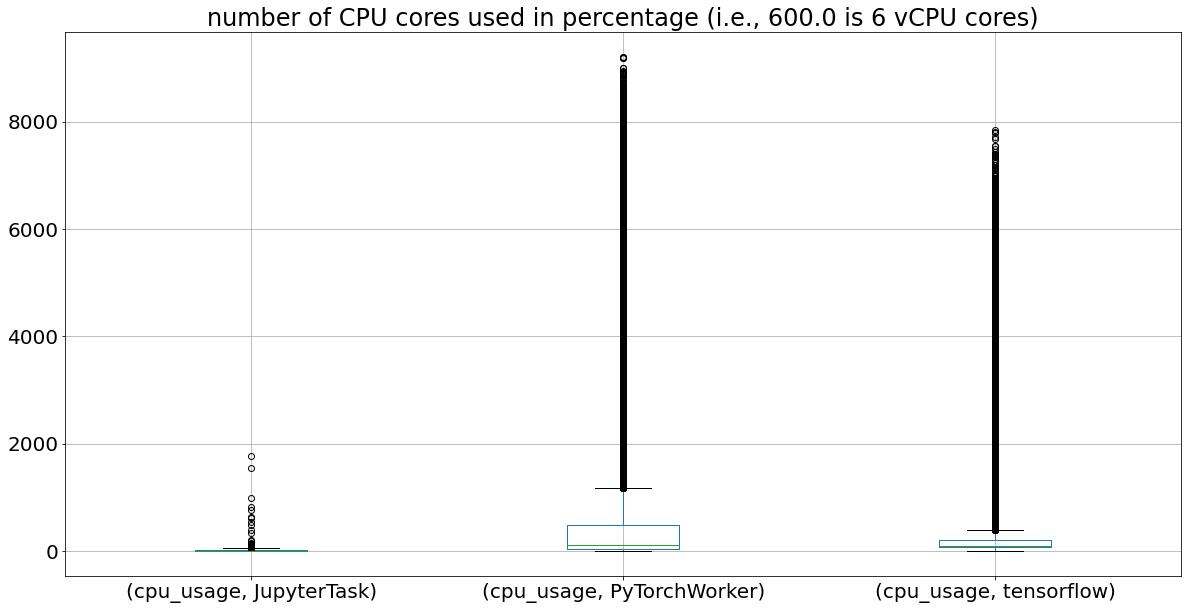

In [30]:
examples[['cpu_usage','task_name']].pivot(columns='task_name').boxplot(figsize=(20,10), fontsize=20)
plt.title("number of CPU cores used in percentage (i.e., 600.0 is 6 vCPU cores)", fontsize=24)


<AxesSubplot:xlabel='task_name', ylabel='count'>

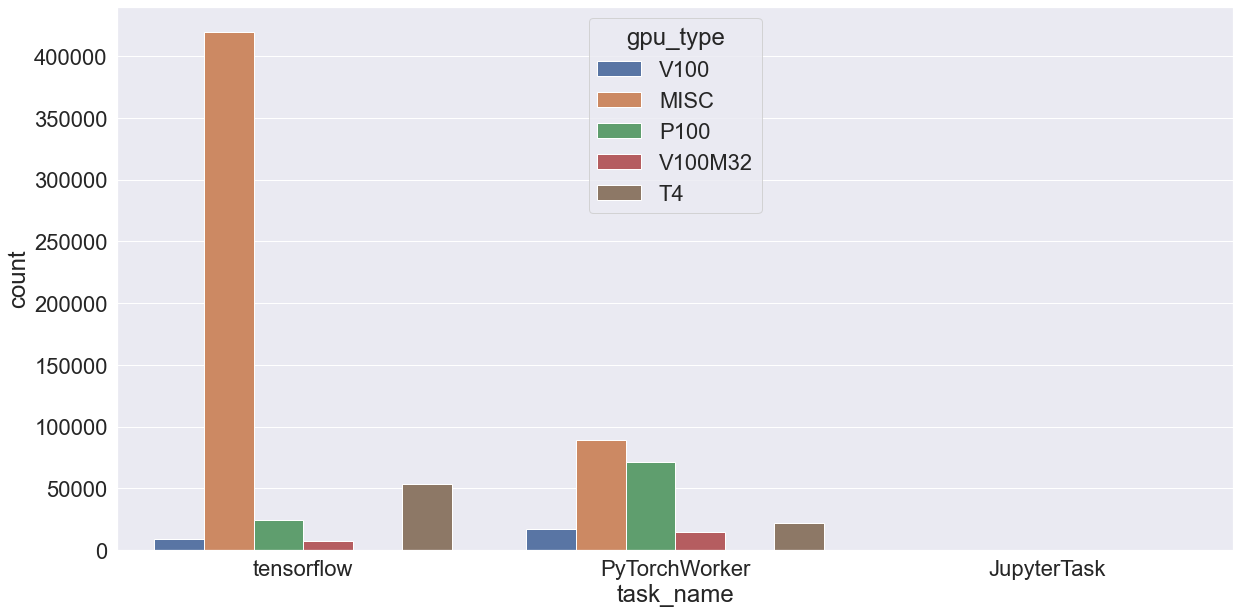

In [31]:
plt.figure(figsize=(20,10))

sns.set(font_scale=2)

sns.countplot(x="task_name", hue="gpu_type", data=examples)



#plt.tight_layout()
#plt.savefig('Figures/kmeans-k9-countplot.pdf')

## Shuffle + StandardScaler

In [66]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(examples.task_name)
y = le.transform(examples.task_name)


In [62]:
from sklearn.model_selection import StratifiedShuffleSplit

In [74]:
import random

In [75]:
def stratified_proportional_sampling(dataframe_in, filter_metric, filter_values, sampling_perc):
    target_vals = []
    for val in filter_values:
        val_array = dataframe_in[dataframe_in[filter_metric] == val].select_dtypes(include=np.number).fillna(0).values
        target_vals = target_vals + random.sample(list(val_array), int(val_array.shape[0] * sampling_perc))
    return target_vals

In [119]:
def stratified_sample(df, strata, size=None, seed=None, keep_index= True):
    '''
    It samples data from a pandas dataframe using strata. These functions use
    proportionate stratification:
    n1 = (N1/N) * n
    where:
        - n1 is the sample size of stratum 1
        - N1 is the population size of stratum 1
        - N is the total population size
        - n is the sampling size
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    :seed: sampling seed
    :keep_index: if True, it keeps a column with the original population index indicator
    
    Returns
    -------
    A sampled pandas dataframe based in a set of strata.
    Examples
    --------
    >> df.head()
    	id  sex age city 
    0	123 M   20  XYZ
    1	456 M   25  XYZ
    2	789 M   21  YZX
    3	987 F   40  ZXY
    4	654 M   45  ZXY
    ...
    # This returns a sample stratified by sex and city containing 30% of the size of
    # the original data
    >> stratified = stratified_sample(df=df, strata=['sex', 'city'], size=0.3)
    Requirements
    ------------
    - pandas
    - numpy
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True 
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"
            
            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)
        
        # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = stratified_df.append(tmp_df, ignore_index=True)
    
    return stratified_df



def stratified_sample_report(df, strata, size=None):
    '''
    Generates a dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    Parameters
    ----------
    :df: pandas dataframe from which data will be sampled.
    :strata: list containing columns that will be used in the stratified sampling.
    :size: sampling size. If not informed, a sampling size will be calculated
        using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Returns
    -------
    A dataframe reporting the counts in each stratum and the counts
    for the final sampled dataframe.
    '''
    population = len(df)
    size = __smpl_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)
    return tmp_grpd


def __smpl_size(population, size):
    '''
    A function to compute the sample size. If not informed, a sampling 
    size will be calculated using Cochran adjusted sampling formula:
        cochran_n = (Z**2 * p * q) /e**2
        where:
            - Z is the z-value. In this case we use 1.96 representing 95%
            - p is the estimated proportion of the population which has an
                attribute. In this case we use 0.5
            - q is 1-p
            - e is the margin of error
        This formula is adjusted as follows:
        adjusted_cochran = cochran_n / 1+((cochran_n -1)/N)
        where:
            - cochran_n = result of the previous formula
            - N is the population size
    Parameters
    ----------
        :population: population size
        :size: sample size (default = None)
    Returns
    -------
    Calculated sample size to be used in the functions:
        - stratified_sample
        - stratified_sample_report
    '''
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

In [120]:
stratified_sample_report(examples, ['task_name'], 80000)

/tmp/ipykernel_3994546/2145870966.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['size'] = 1


,task_name,size,samp_size
0,JupyterTask,378,42
1,PyTorchWorker,214849,23605
2,tensorflow,512909,56353


In [121]:
examples_sampled = stratified_sample(examples, ['task_name'], size=80000, seed=123, keep_index= True)
examples_sampled.head()

/tmp/ipykernel_3994546/2145870966.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['size'] = 1


,index,job_name,task_name,worker_name,inst_id,machine,gpu_name,cpu_usage,gpu_wrk_util,avg_mem,max_mem,avg_gpu_wrk_mem,max_gpu_wrk_mem,read,write,read_count,write_count,gpu_type
0,1010272,bf1bb8cd96cd19e1ee8fa5dd,JupyterTask,0c9a0d07cb296e90c8624e1101a57e9a0ee642bbd6b4b5...,2faadde80a65466b020037994ceaeb63b628e8d94c94df...,31180a7c410df77a6e81a319,/dev/nvidia1,72.845760,2.365114,16.060270,39.257812,6.384934,8.547852,6.910916e+07,5.855475e+07,599.811871,160.134900,P100
1,2905256,70e640ab2e9337b533eeca84,JupyterTask,acf05f3e7aa0abcf058a64d2b4119927b4147511fabedb...,86c40045b696aa5ea9ed237e9bd9fa712596ba53c8eab8...,330e07d841d644d75feb4b8f,/dev/nvidia7,75.234997,0.857611,2.874521,11.432617,0.920229,4.352539,1.214870e+07,1.113446e+06,467.069135,127.162317,MISC
2,175636,fa034ce687c6b3bd70438c75,JupyterTask,df4ec643dd5e28161fe9dfca513958c2570fc24e7e6302...,d98d6fe62aadb43ed6c10b2df9c0c3b6bc0c800cc39c84...,e8ddd1d4a9f75b6f66fab3e2,/dev/nvidia1,1.368785,0.000000,0.334477,0.408203,0.000000,0.000000,1.643032e+05,3.348666e+04,86.905220,18.899725,MISC
3,952812,63014ff366616af317bbb6ad,JupyterTask,cecc7b4caed10a394fa0eded23db16c8d6b3f96d178557...,068e3d771526f0de15ff6df3080631fbaf811005633896...,405d86056a38bc086a130c73,/dev/nvidia1,0.596750,0.000000,0.238747,1.800781,0.000000,0.000000,8.671857e+03,6.063244e+03,34.351620,15.365760,MISC
4,1344584,06fcaf3277d42908c308235e,JupyterTask,3d18b13a8c9a7f625087dd7fc8f0a86f0cad9ea5441b13...,6dc29f7861a7d4999b07b4e0e7fd342e37d9264d5efa7b...,edd7369d3763a75aebf18a8a,/dev/nvidia6,3.196262,0.000000,0.474609,0.554688,0.000000,0.000000,1.054398e+06,2.041204e+05,386.882883,41.099099,MISC


In [122]:
st_scaler_ex = StandardScaler()
X_examples = st_scaler_ex.fit_transform(examples_sampled.select_dtypes(include=np.number).fillna(0).values)

## PCA

In [123]:
from sklearn.decomposition import PCA

In [124]:
pca = PCA(n_components=3, svd_solver='auto')

In [125]:
pca.fit(X_examples)

PCA(n_components=3)

In [126]:
print(pca.explained_variance_ratio_)

[0.36947246 0.16595079 0.0911616 ]


In [127]:
print(pca.singular_values_)

[570.20677605 382.14748368 283.23524965]


In [128]:
pca_examples = pca.transform(X_examples)

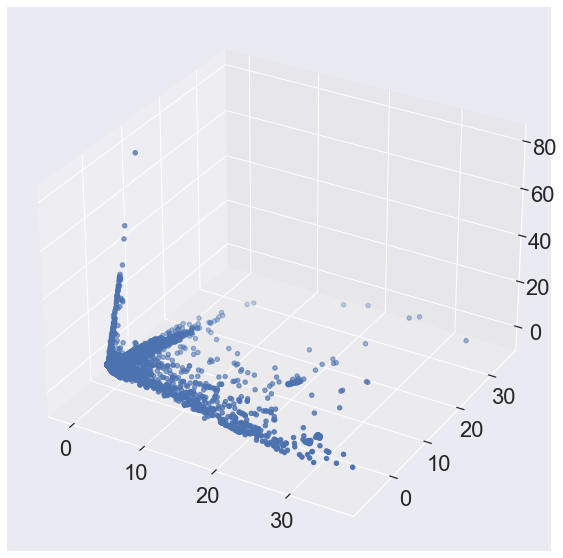

In [129]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(projection='3d')

ax.scatter(pca_examples[:,0], pca_examples[:, 1], pca_examples[:,2])

plt.show()

In [200]:
total_list = []
for el in set(examples_sampled.task_name.values):
    print(el)
    mask = examples_sampled.loc[:,'task_name'] == el
    mask.values
    key_list = []
    for count, flag in enumerate(mask):
        if flag:
            key_list.append(pca_examples[count,:])
    total_list.append(np.array(key_list))

tensorflow
JupyterTask
PyTorchWorker


In [196]:
total_list[0].shape

(56353, 3)

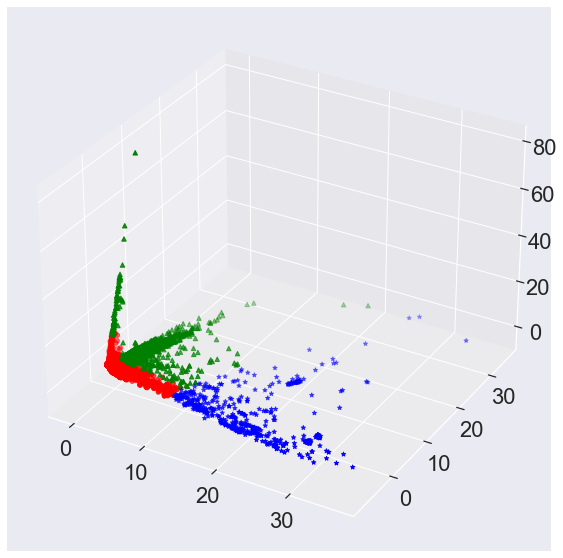

In [221]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(projection='3d')

ax.scatter(total_list[0][:,0], total_list[0][:, 1], total_list[0][:,2], marker='o', color='red')
ax.scatter(total_list[2][:,0], total_list[2][:, 1], total_list[2][:,2], marker='^', color='green')
ax.scatter(total_list[1][:,0], total_list[1][:, 1], total_list[1][:,2], marker='*', color='blue')

plt.show()

## DBSCAN

In [130]:
from sklearn.cluster import DBSCAN

In [131]:
dbscan = DBSCAN(n_jobs=-1)

In [132]:
dbscan.fit_predict(pca_examples)

array([0, 0, 0, ..., 0, 0, 0])

In [133]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
from collections import Counter

In [135]:
Counter(list(dbscan.labels_))

Counter({0: 78891,
         -1: 517,
         1: 30,
         15: 6,
         17: 6,
         2: 16,
         27: 5,
         3: 28,
         19: 8,
         4: 81,
         5: 38,
         6: 55,
         22: 9,
         7: 64,
         8: 7,
         9: 10,
         18: 5,
         12: 13,
         25: 5,
         20: 83,
         14: 5,
         10: 7,
         11: 8,
         23: 5,
         26: 5,
         13: 8,
         24: 4,
         16: 5,
         21: 36,
         28: 8,
         32: 5,
         29: 8,
         31: 6,
         33: 7,
         30: 6})

## KMEANS

In [136]:
from sklearn.cluster import KMeans

In [175]:
kmeans = KMeans(n_clusters=3, n_init=10000)

In [176]:
kmeans.fit(pca_examples)

KMeans(n_clusters=3, n_init=10000)

In [178]:
Counter(list(kmeans.labels_))

Counter({0: 75358, 2: 4055, 1: 587})

In [179]:
examples_sampled_kmeans3 = examples_sampled.copy()

In [180]:
examples_sampled_kmeans3['kmeans_clusters'] = kmeans.labels_

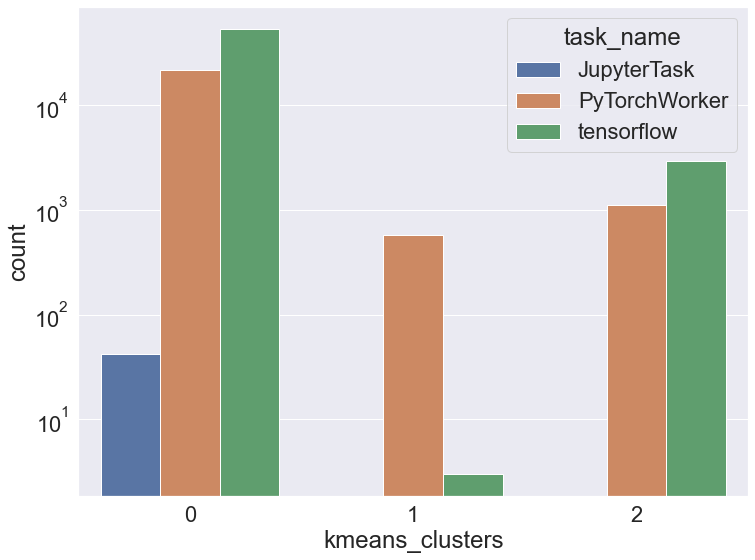

In [222]:
plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
sns.countplot(x="kmeans_clusters", hue="task_name", data=examples_sampled_kmeans3)
plt.yscale('log')
#plt.tight_layout()
#plt.savefig('Figures/kmeans-k9-countplot.pdf')

In [183]:
examples_sampled_kmeans3.loc[:,'kmeans_clusters'] == 2

0        False
1        False
2        False
3        False
4        False
         ...  
79995    False
79996    False
79997    False
79998    False
79999    False
Name: kmeans_clusters, Length: 80000, dtype: bool

In [217]:
total_list = []
for el in set(examples_sampled_kmeans3.kmeans_clusters.values):
    print(el)
    mask = examples_sampled_kmeans3.loc[:,'kmeans_clusters'] == el
    mask.values
    key_list = []
    for count, flag in enumerate(mask):
        if flag:
            key_list.append(pca_examples[count,:])
    total_list.append(np.array(key_list))

0
1
2


In [218]:
total_list[0].shape

(75358, 3)

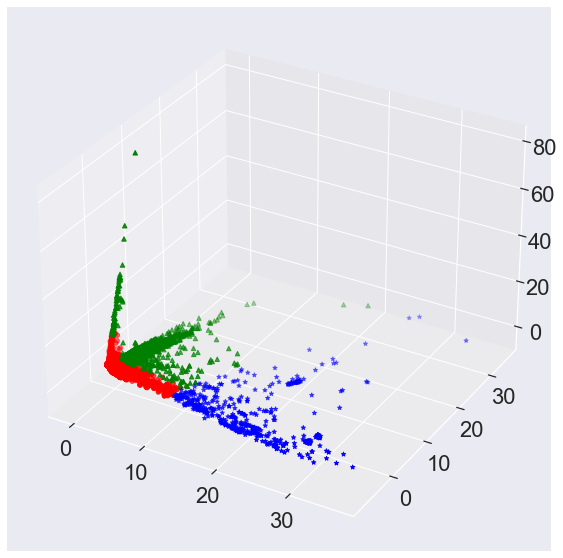

In [219]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(projection='3d')

ax.scatter(total_list[0][:,0], total_list[0][:, 1], total_list[0][:,2], marker='o', color='red')
ax.scatter(total_list[1][:,0], total_list[1][:, 1], total_list[1][:,2], marker='*', color='blue')
ax.scatter(total_list[2][:,0], total_list[2][:, 1], total_list[2][:,2], marker='^', color='green')

plt.show()

## VAE on example subset

In [174]:
examples_sampled.select_dtypes(include=np.number).fillna(0).values.shape

(80000, 11)

In [133]:
import keras
from keras import layers

In [134]:
original_dim = X.shape[1]
intermediate_dim = 25
latent_dim = 3

In [135]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

We can use these parameters to sample new similar points from the latent space:

In [136]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

Finally, we can map these sampled latent points back to reconstructed inputs:

In [137]:
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

What we've done so far allows us to instantiate 3 models:

- an end-to-end autoencoder mapping inputs to reconstructions
- an encoder mapping inputs to the latent space
- a generator that can take points on the latent space and will output the corresponding reconstructed samples.


We train the model using the end-to-end model, with a custom loss function: the sum of a reconstruction term, and the KL divergence regularization term.



In [138]:
import tensorflow as tf
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [139]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [143]:
vae.fit(X_train, X_train,
        epochs=100,
        batch_size=32,
        
        validation_data=(X_val, X_val))

Epoch 1/100
 1889/15726 [==>...........................] - ETA: 1:36 - loss: nan

KeyboardInterrupt: 

## EDA

In [ ]:
set(job_agg_sensor_df.columns.get_level_values(0))

### GPU WORK MEM

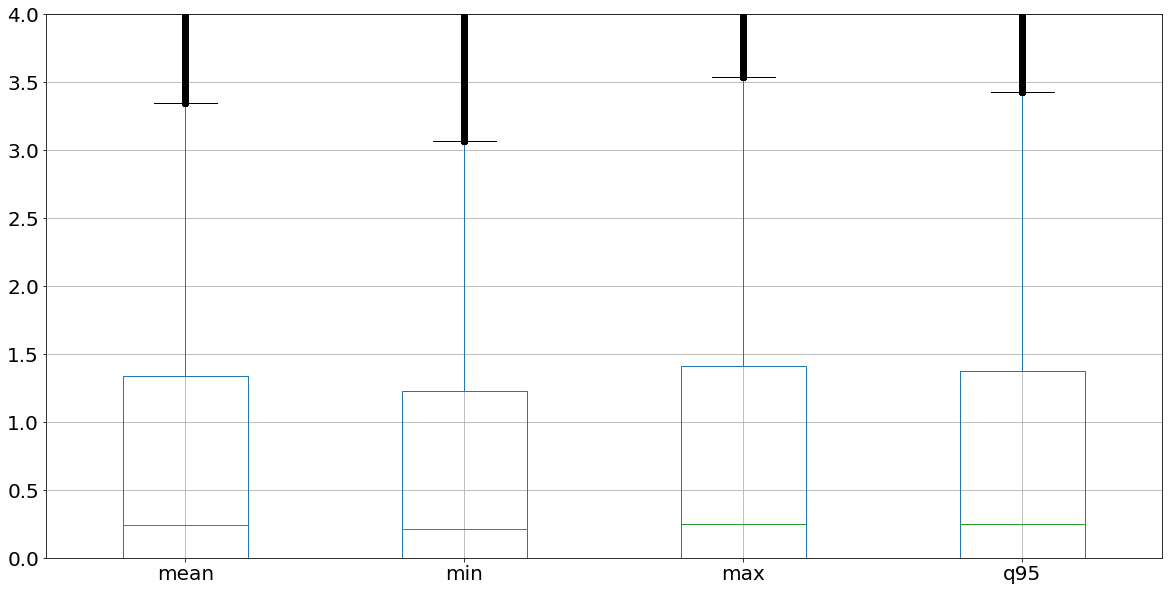

In [46]:
ax = job_agg_sensor_df[:503207]['avg_gpu_wrk_mem'].boxplot(figsize=(20,10), fontsize=20, return_type='axes')

ax.set_ylim(0, 4)
plt.show()

### GPU WRK UTIL

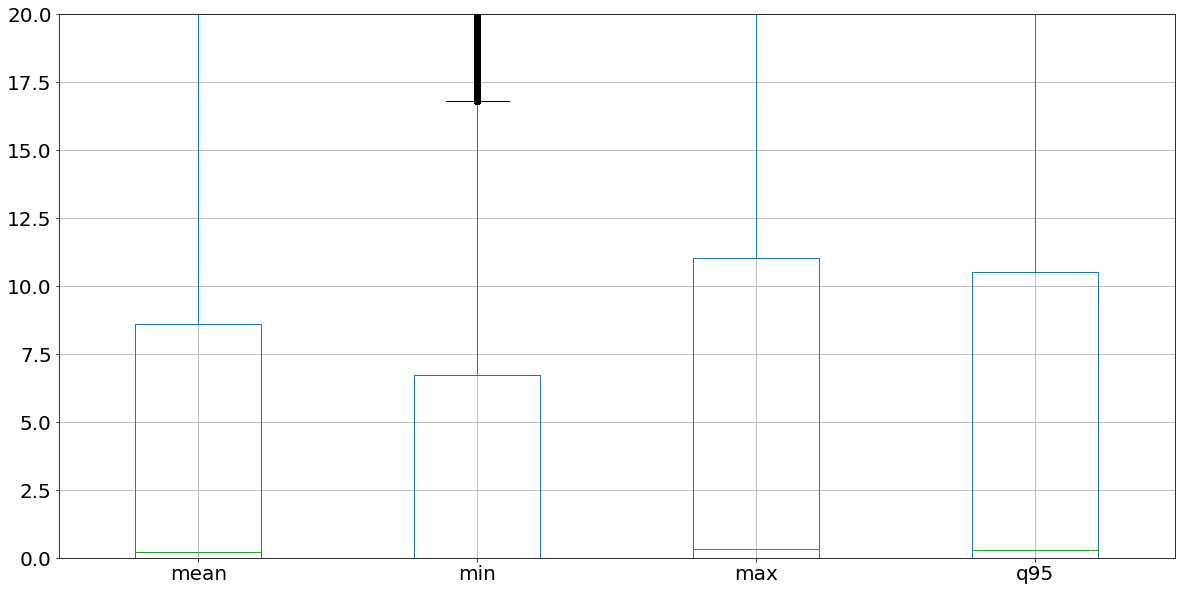

In [48]:
ax = job_agg_sensor_df[:503207]['gpu_wrk_util'].boxplot(figsize=(20,10), fontsize=20, return_type='axes')

ax.set_ylim(0, 20)
plt.show()

### CPU USAGE

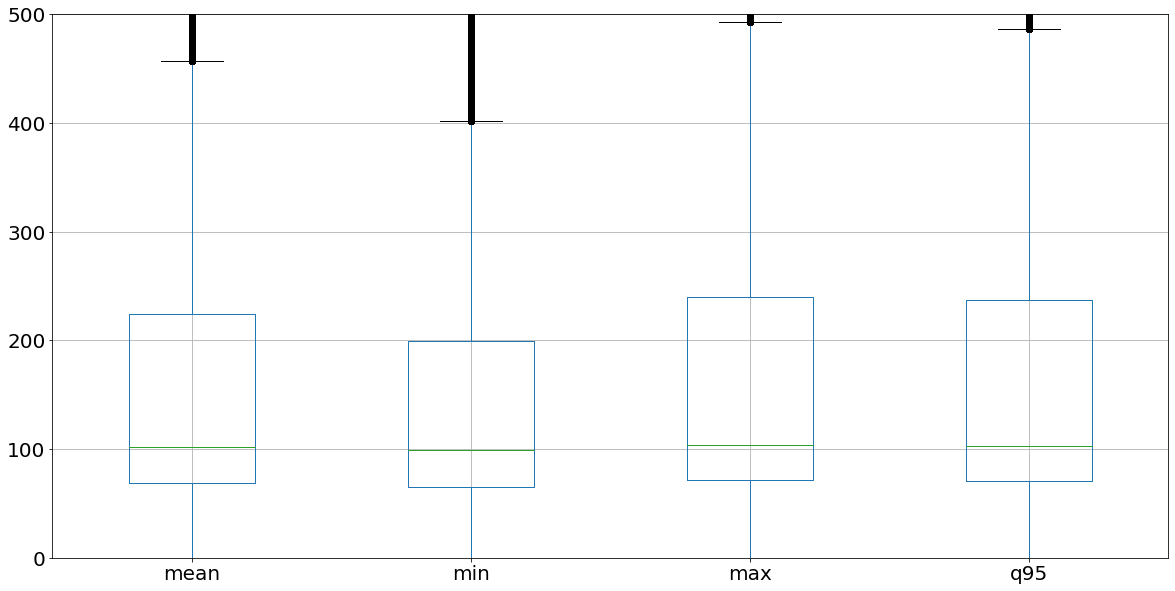

In [39]:
ax = job_agg_sensor_df[:503207]['cpu_usage'].boxplot(figsize=(20,10), fontsize=20, return_type='axes')

ax.set_ylim(0, 500)
plt.show()

## Variational autoencoders

In [ ]:
job_agg_sensor_df = sensor_df.groupby('job_name').agg([('mean', 'mean'), ('min', 'min'), ('max', 'max'), ('q95', percentile(95))])

In [ ]:
job_agg_sensor_df.fillna(0, inplace=True)

In [ ]:
job_agg_sensor_df

In [ ]:
std_scale = StandardScaler()

In [ ]:
X = std_scale.fit_transform(job_agg_sensor_df)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=1)

X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


In [ ]:
(X_train.shape, X_val.shape, X_test.shape)

In [133]:
import keras
from keras import layers

In [134]:
original_dim = X.shape[1]
intermediate_dim = 25
latent_dim = 3

In [135]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

We can use these parameters to sample new similar points from the latent space:

In [136]:
from keras import backend as K

def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])

Finally, we can map these sampled latent points back to reconstructed inputs:

In [137]:
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')

What we've done so far allows us to instantiate 3 models:

- an end-to-end autoencoder mapping inputs to reconstructions
- an encoder mapping inputs to the latent space
- a generator that can take points on the latent space and will output the corresponding reconstructed samples.


We train the model using the end-to-end model, with a custom loss function: the sum of a reconstruction term, and the KL divergence regularization term.



In [138]:
import tensorflow as tf
mape = tf.keras.losses.MeanAbsolutePercentageError()

In [139]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [143]:
vae.fit(X_train, X_train,
        epochs=100,
        batch_size=32,
        
        validation_data=(X_val, X_val))

Epoch 1/100
 1889/15726 [==>...........................] - ETA: 1:36 - loss: nan

KeyboardInterrupt: 

In [111]:
import matplotlib.pyplot as plt

In [80]:
x_test_encoded = encoder.predict(X_val, batch_size=32)

[array([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], dtype=float32),
 array([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], dtype=float32),
 array([[nan, nan],
        [nan, nan],
        [nan, nan],
        ...,
        [nan, nan],
        [nan, nan],
        [nan, nan]], dtype=float32)]